<a href="https://colab.research.google.com/github/Harshi07-c/Enhancing-LLM-s-Response-for-Lesson-preparation-Material-by-Prompt-Refinement-Technique/blob/main/Rule_Based_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from time import sleep

In [ ]:
with open("/content/test_dataset.json",'r') as file :
  data = json.load(file)

In [ ]:
data

In [ ]:
import csv

def evaluate_lecture_material(lecture_material, csv_filename):
    with open(csv_filename, mode='w', newline='') as file:
        fieldnames = ['query', 'ZS_score', 'FS_score', 'TB_score']
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        writer.writeheader()

        for item in lecture_material:
            row = {'query': item['query']}
            for key in item.keys():
                if key != 'query':
                    lecture = item[key]
                    score = 0
                    # Convert lecture to lowercase for comparison
                    lecture_lower = lecture.lower()
                    if 'topic' in lecture_lower:
                        score += 1
                    if 'objectives' in lecture_lower:
                        score += 1
                    if 'theory' in lecture_lower:
                        score += 1
                    if 'code implementation' in lecture_lower or 'different approaches' in lecture_lower:
                        score += 1
                    if 'explanation' in lecture_lower :
                        score += 1
                    if 'complexity' in lecture_lower:
                        score += 1
                    if 'applications' in lecture_lower:
                        score += 1
                    if 'conclusion' in lecture_lower:
                        score += 1
                    if 'quiz' in lecture_lower:
                        score += 1
                    if 'references' in lecture_lower:
                        score += 1
                    row[key+'_score'] = score
            writer.writerow(row)


# CSV filename
csv_filename = 'lecture_rule_based_scores.csv'

# Evaluate the lecture material and save scores to CSV
evaluate_lecture_material(data, csv_filename)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/lecture_rule_based_scores.csv")

In [ ]:
df

,query,ZS_score,FS_score,TB_score
0,Compare and contrast different sorting techniq...,2,10,9
1,Illustrate the concept of doubly linked lists ...,3,10,9
2,Explain the implementation of stacks using lin...,2,6,9
3,Discuss the applications of arrays in data str...,2,10,9
4,Illustrate the concept of strings in the conte...,3,10,9
5,Explain how linked lists are utilized in repre...,0,9,9
6,Discuss the role of the Dutch National Flag al...,0,10,9
7,Explain how stacks can be implemented iterativ...,2,10,9
8,Illustrate the usage of queues in the context ...,2,10,9
9,Explain the process of hashing and its signifi...,4,10,9


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


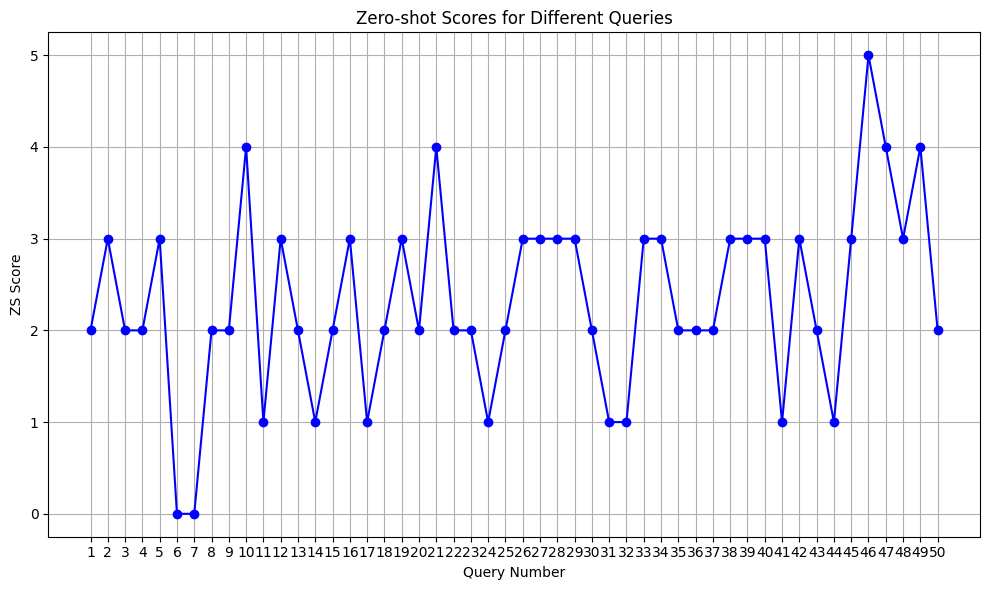

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index + 1, df['ZS_score'], marker='o', color='blue', linestyle='-')
plt.xlabel('Query Number')
plt.ylabel('ZS Score')
plt.title('Zero-shot Scores for Different Queries')
plt.xticks(df.index + 1)  # Set x-axis ticks to match serial numbers
plt.tight_layout()
plt.grid(True)
plt.show()

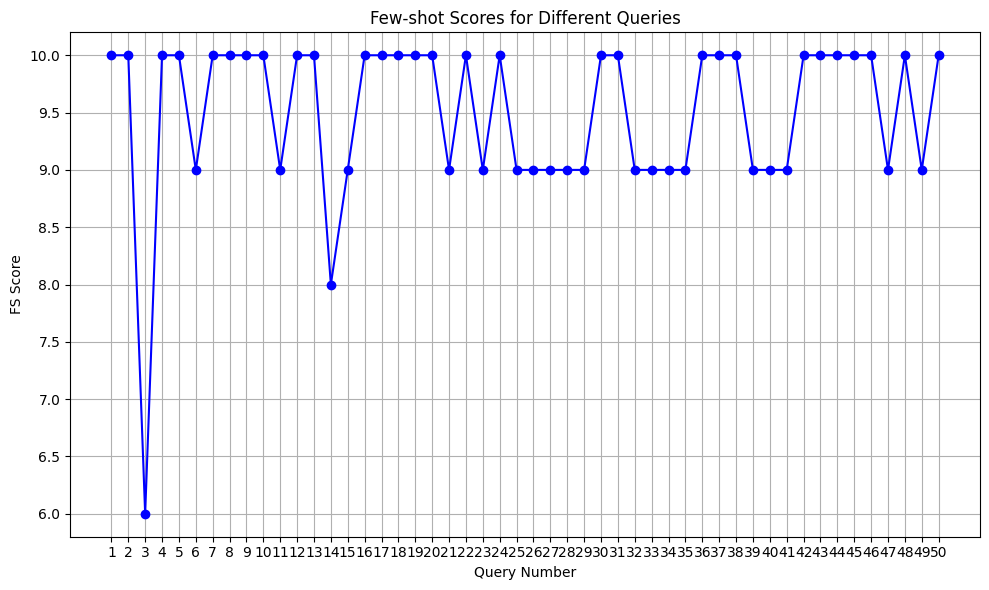

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index + 1, df['FS_score'], marker='o', color='blue', linestyle='-')
plt.xlabel('Query Number')
plt.ylabel('FS Score')
plt.title('Few-shot Scores for Different Queries')
plt.xticks(df.index + 1)  # Set x-axis ticks to match serial numbers
plt.tight_layout()
plt.grid(True)
plt.show()

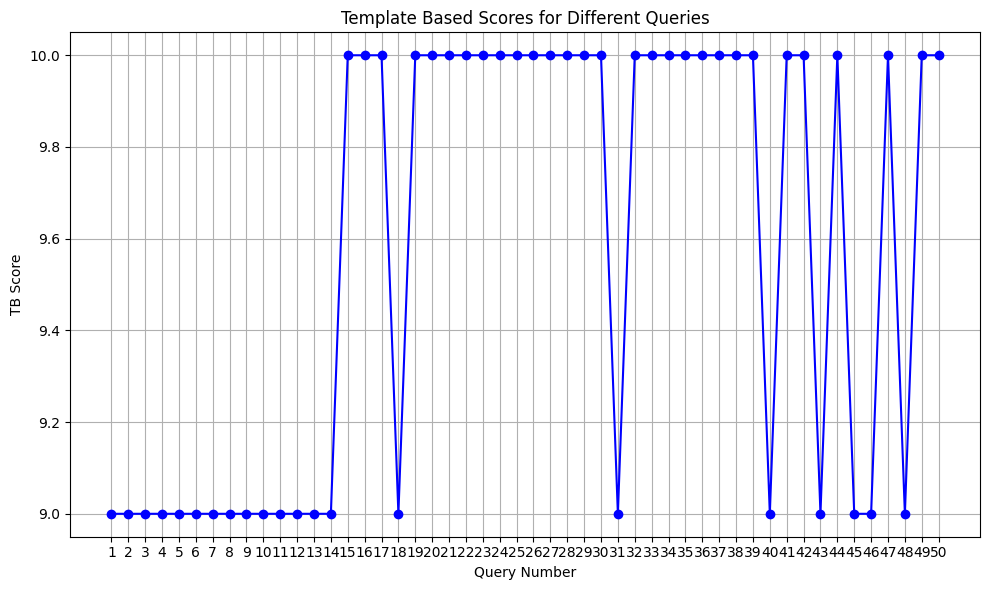

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index + 1, df['TB_score'], marker='o', color='blue', linestyle='-')
plt.xlabel('Query Number')
plt.ylabel('TB Score')
plt.title('Template Based Scores for Different Queries')
plt.xticks(df.index + 1)  # Set x-axis ticks to match serial numbers
plt.tight_layout()
plt.grid(True)
plt.show()

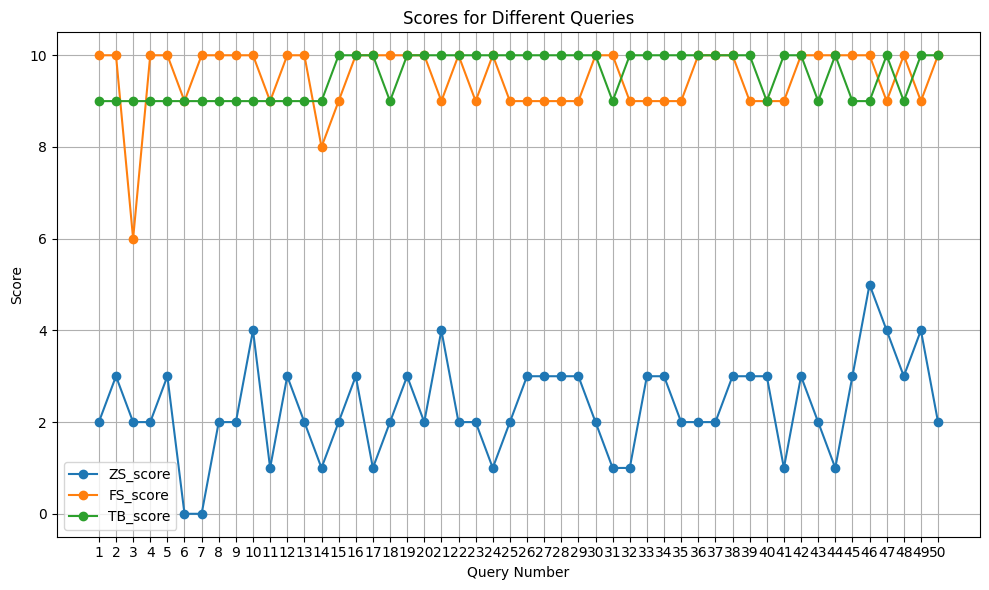

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
for col in df.columns:
  if col == 'query':
    continue
  plt.plot(df.index + 1, df[col], marker='o', linestyle='-', label=col)
plt.xlabel('Query Number')
plt.ylabel('Score')
plt.title('Scores for Different Queries')
plt.xticks(df.index + 1)  # Set x-axis ticks to match serial numbers
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

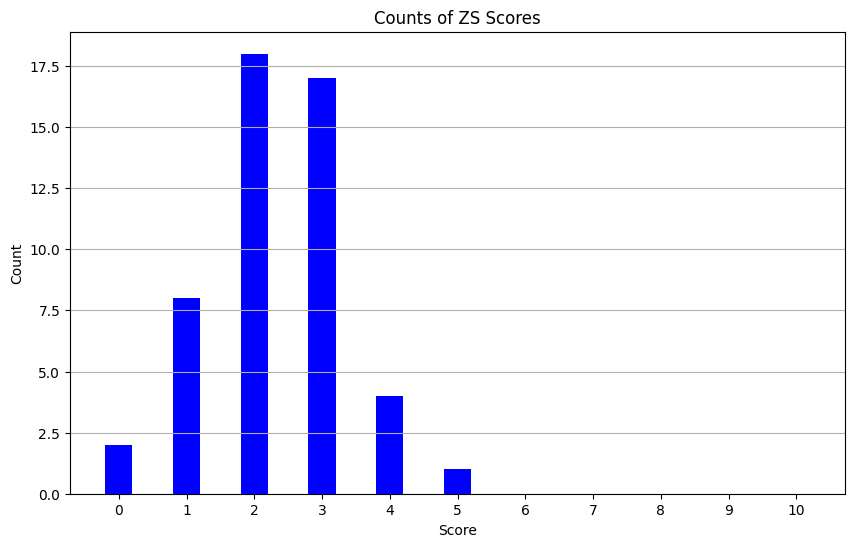

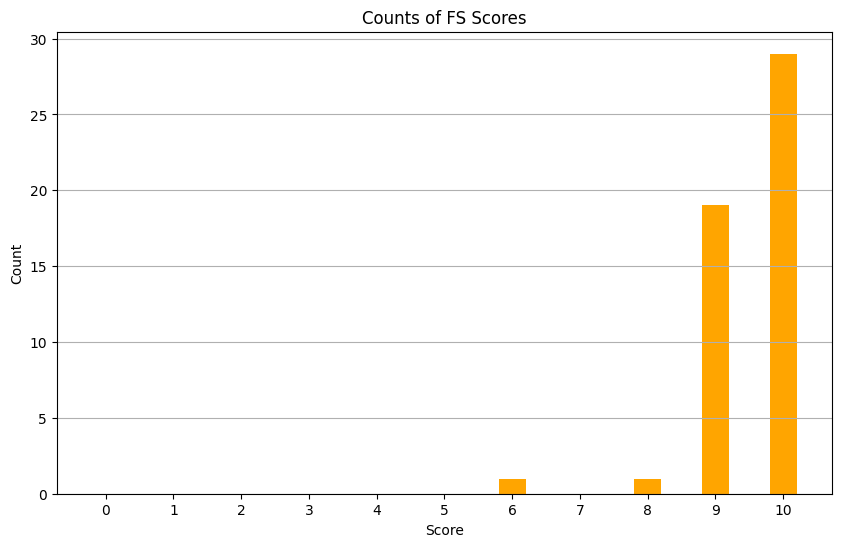

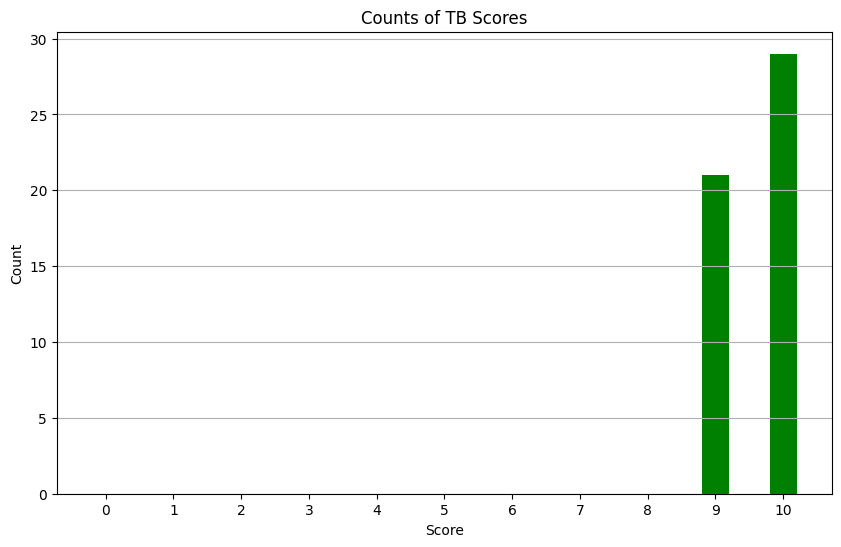

In [ ]:
# Count occurrences of each score in each column
zs_counts = df['ZS_score'].value_counts().sort_index()
fs_counts = df['FS_score'].value_counts().sort_index()
tb_counts = df['TB_score'].value_counts().sort_index()

# Determine x-axis values
x = np.arange(max(max(zs_counts.index), max(fs_counts.index), max(tb_counts.index)) + 1)

# Set width of bars
bar_width = 0.4

# Plot counts for ZS Score
plt.figure(figsize=(10, 6))
plt.bar(x, zs_counts.reindex(x, fill_value=0), width=bar_width, color='blue')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Counts of ZS Scores')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

# Plot counts for FS Score
plt.figure(figsize=(10, 6))
plt.bar(x, fs_counts.reindex(x, fill_value=0), width=bar_width, color='orange')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Counts of FS Scores')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

# Plot counts for TB Score
plt.figure(figsize=(10, 6))
plt.bar(x, tb_counts.reindex(x, fill_value=0), width=bar_width, color='green')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Counts of TB Scores')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

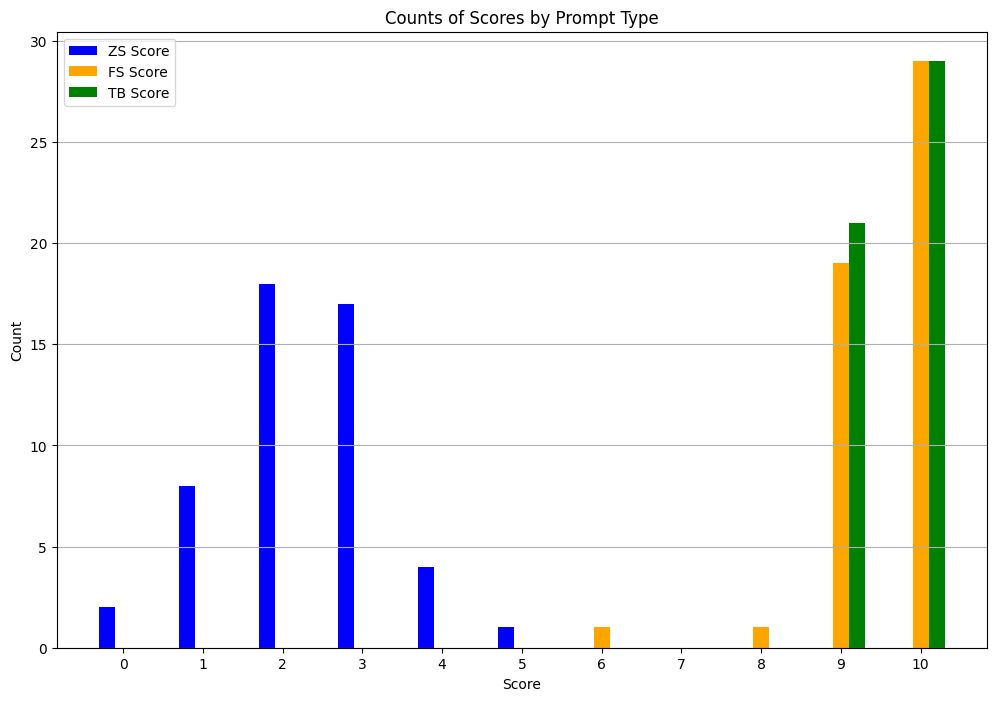

In [ ]:
# Determine x-axis values
x = np.arange(max(max(zs_counts.index), max(fs_counts.index), max(tb_counts.index)) + 1)

# Set width of bars
bar_width = 0.2

# Plot combined counts for all prompt types
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width, zs_counts.reindex(x, fill_value=0), width=bar_width, color='blue', label='ZS Score')
plt.bar(x, fs_counts.reindex(x, fill_value=0), width=bar_width, color='orange', label='FS Score')
plt.bar(x + bar_width, tb_counts.reindex(x, fill_value=0), width=bar_width, color='green', label='TB Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Counts of Scores by Prompt Type')
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.show()